In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Model ML
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

#Evaluation
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('1708069620739-boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

## EDA

In [4]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
features = list(df.columns)
features

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

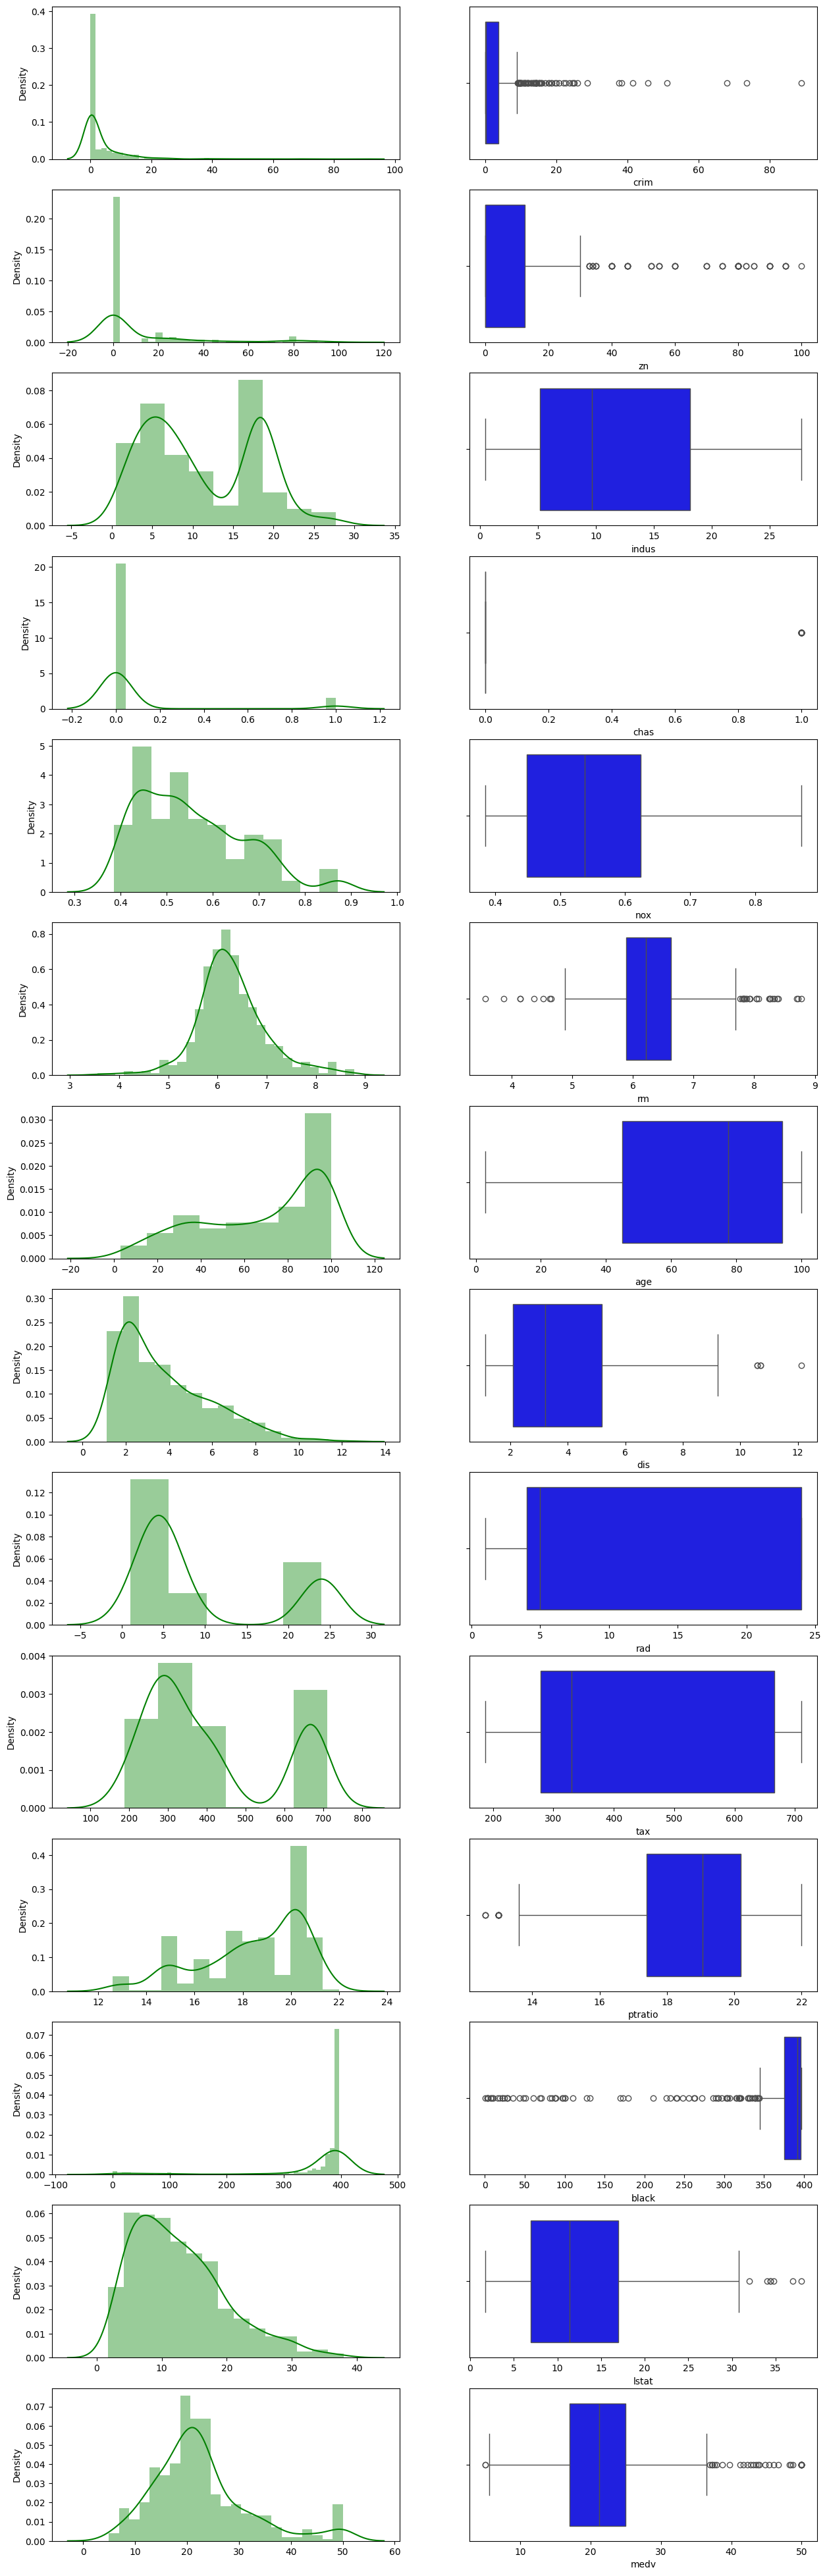

In [6]:
features = list(df.columns)
fig, ax = plt.subplots(len(features),2,figsize=(15,50))
for idx, column in enumerate(features):
    sns.distplot(
        x=df[column],
        color='green',
        ax=ax[idx][0])
    sns.boxplot(
        x=df[column],
        color='blue',
        ax=ax[idx][1]
        )

In [7]:
X_feature = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']
X_index = list(range(len(X_feature)))
X_index

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

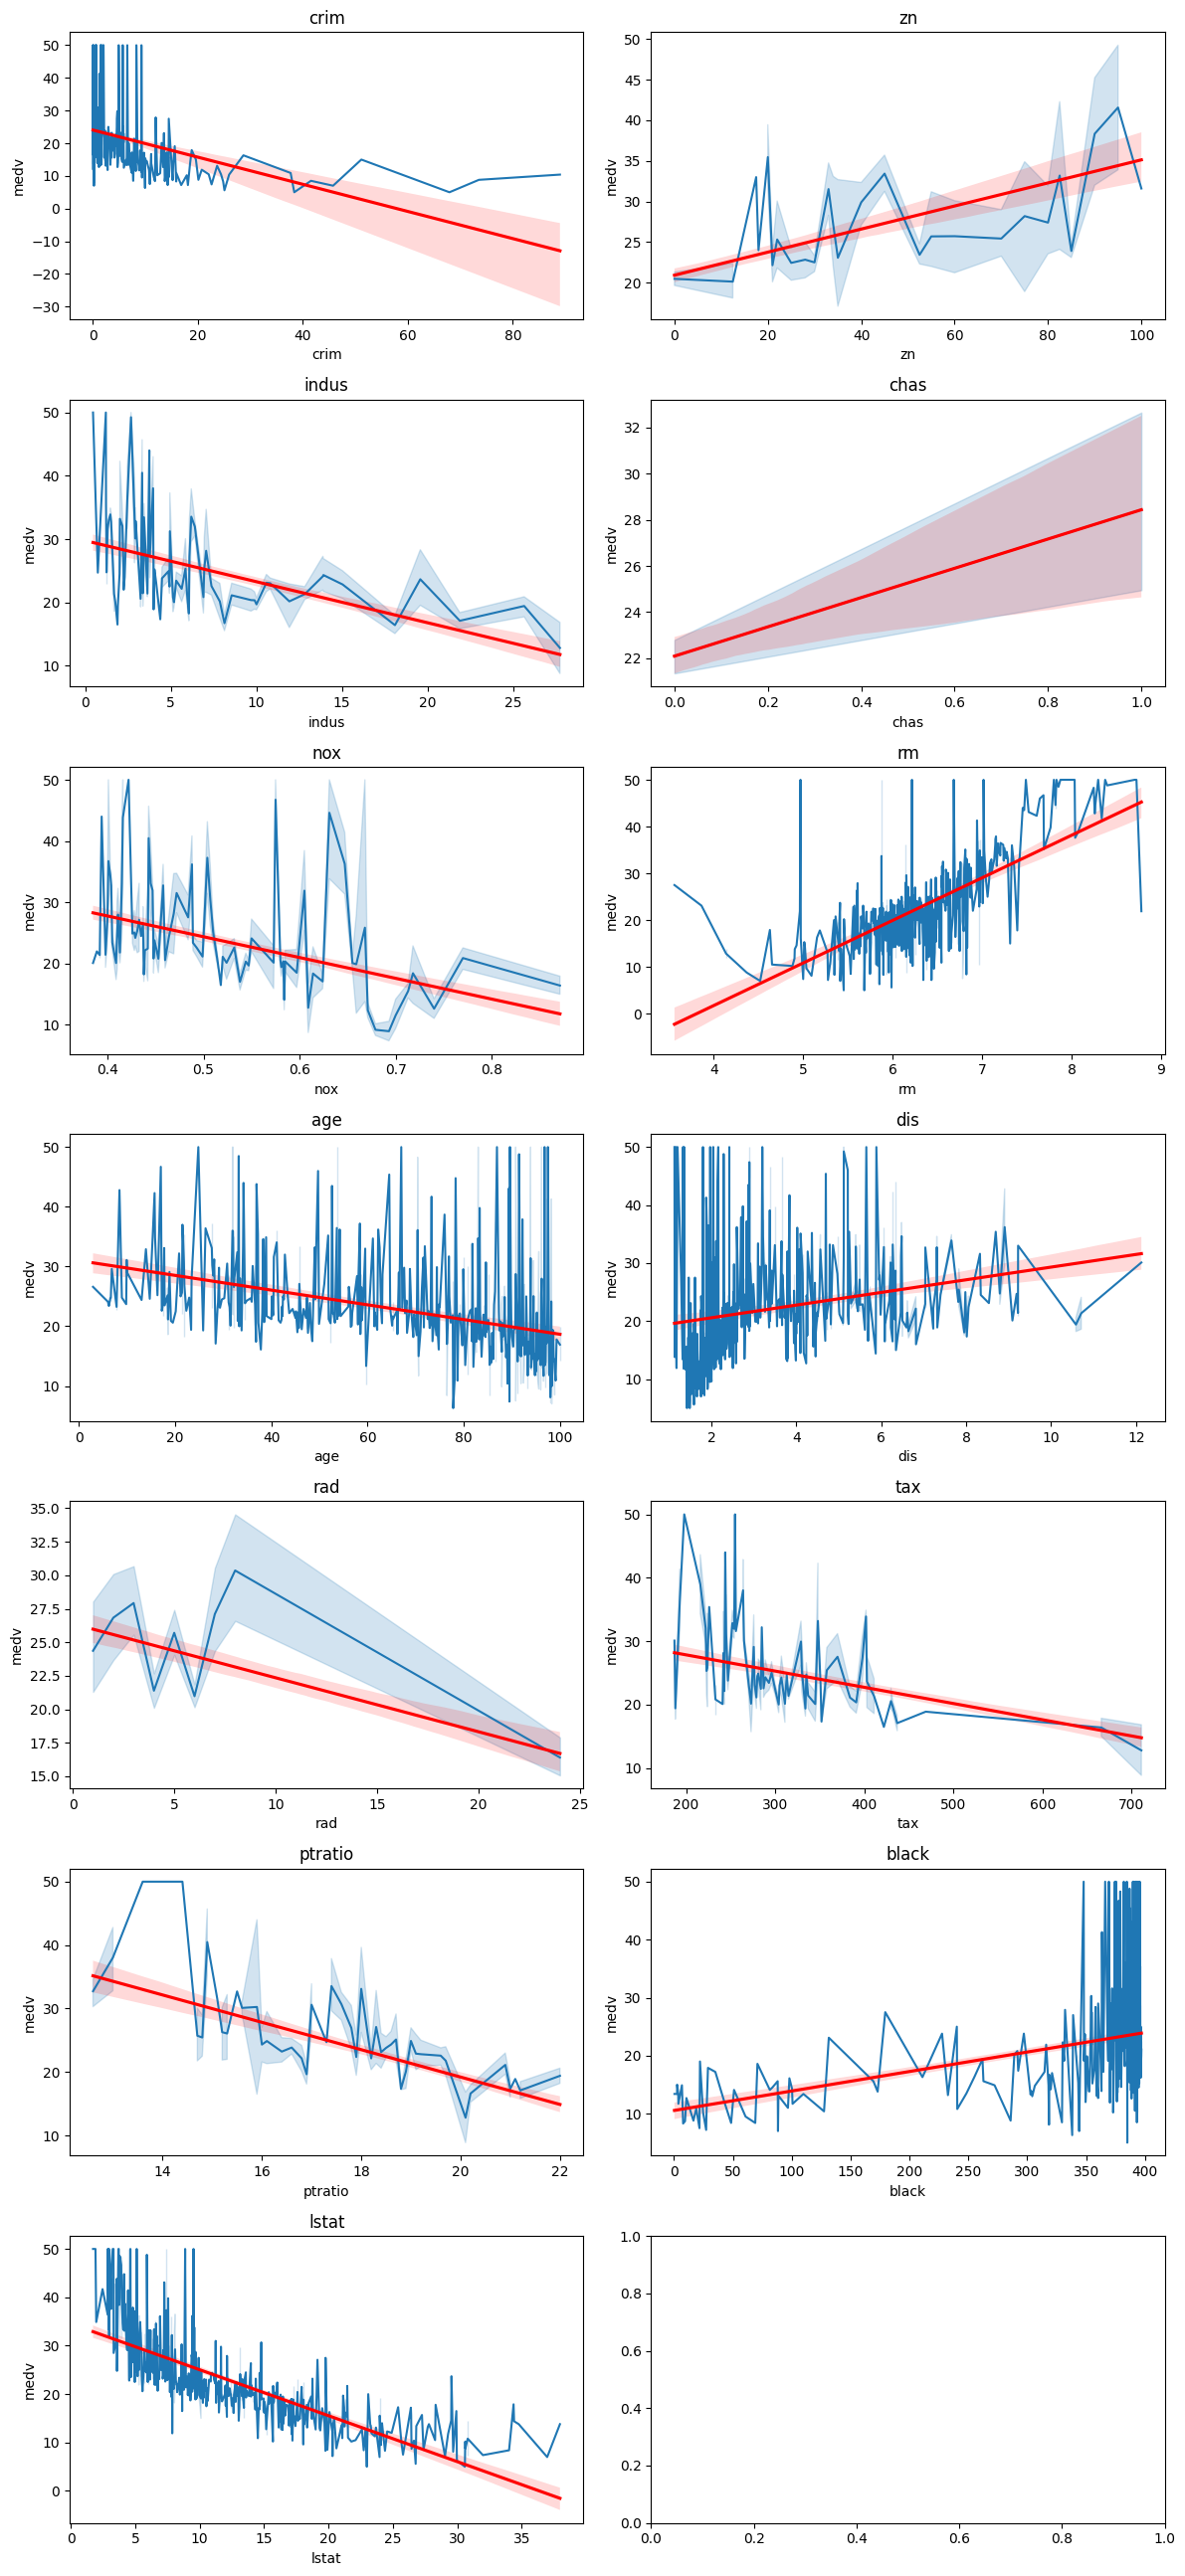

In [8]:
X_feature = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']
X_index = list(range(len(X_feature)))
fig, ax = plt.subplots(7, 2, figsize=(12, 26))

# Mengatur index untuk akses array 1D
flat_ax = ax.flatten()

for i in X_index:
    # Lineplot
    sns.lineplot(data=df, x=X_feature[i], y='medv', ax=flat_ax[i])
    flat_ax[i].set_title(X_feature[i])

    # Regplot (Linear Regression)
    sns.regplot(data=df, x=X_feature[i], y='medv', ax=flat_ax[i], scatter=False, color='red')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()


### Volunter Dari Students :)
Jelaskan interpretasi dari tiap grafik diatas :


- Crim
Ketika tingkat kriminalitas di bawah 20, terlihat kecenderungan bahwa semakin tinggi tingkat kriminalitas, semakin rendah harga rumahnya. Namun, ketika tingkat kriminalitas di atas 20, terdapat kecenderungan harga rumah cenderung stabil dan rendah.
- rm
semakin banyak ruangan per hunian maka semakin tinggi harga rumah
- nox
hubungan antara kadar nox dan rumah cenderung tidak stabil, tetapi terlihat sedikit kecenderungan ketika semakin tinggi kadar nox maka semakin rendah harga rumah

- dari

## Feature Engineering
1. Drop duplikat
2. Feature Scalling
3. Outlier Handling -> Nilai-nilai diatas, secara distribusi masih wajar sehingga tidak perlu handling outlier
* Unsupervised tidak perlu di-splitting

In [9]:
# Drop Duplicates

print(f"Dataframe dimension before duplication drop {df.shape[0]}")

#membuang duplikat data
df = df.drop_duplicates().reset_index(drop=True)

print(f"Dataframe dimension after duplication drop {df.shape[0]}")

Dataframe dimension before duplication drop 506
Dataframe dimension after duplication drop 506


### Volunter Dari Students :)
Lakukan Feature scalling menggunakan Standar Scaller, tanpa splitting dan lakukan di variabel predictor (variabel X) saja.

In [10]:
X = df.drop('medv', axis=1).values
y = df['medv'].values

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# Feature Scalling
# ini tujuannya untuk melakukan transformasi nilai pada kolom menjadi distribusi normal (rata2 = 0, standar deviasinya = 1)
# Lakukan hanya pada kolom predictor, kolom targetnya ialah medv
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [33]:
X_std

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [13]:
feats = ['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat']
#assign tanpa medv -> kolom target
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [14]:
new_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02
mean,-1.123388e-16,7.898820e-17,2.106352e-16,-3.510587e-17,-1.965929e-16,-1.088282e-16,-1.474446e-16,-8.425408e-17,-1.123388e-16,0.000000,-4.212704e-16,-7.442444e-16,-3.089316e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-0.767576,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-0.464673,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194,1.638828e+00,4.410519e-01,3.548771e+00


## PCA

In [15]:
from sklearn.decomposition import PCA #proses PCA

pca = PCA()
#input n_component dicoba sebanyak kolom yang ada pada dataset
principal_components = pca.fit_transform(new_df)

# Explained variance ratio -> sebanding dengan eigen value. Explained ratio = masing2 nilai eigen value / total nilai eigen value
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance -> seberapa besar informasi yang didapat
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

In [16]:
print('Explained variance:', explained_variance_ratio)
print('Cumulative explained variance:', cumulative_explained_variance)

Explained variance: [0.47129606 0.11025193 0.0955859  0.06596732 0.06421661 0.05056978
 0.04118124 0.03046902 0.02130333 0.01694137 0.0143088  0.01302331
 0.00488533]
Cumulative explained variance: [0.47129606 0.581548   0.67713389 0.74310121 0.80731782 0.8578876
 0.89906884 0.92953786 0.9508412  0.96778257 0.98209137 0.99511467
 1.        ]


A. penjelasan ratio varian
hanya pada pc1 0.47%
hanya pd pc2 11,02%
hanya pada pc3 9.55%

B. Cumulative explained varian -> Kombinasi linear (penjumlahan linear)
0.47%  PC1 saja
0.58% pc1+pc2

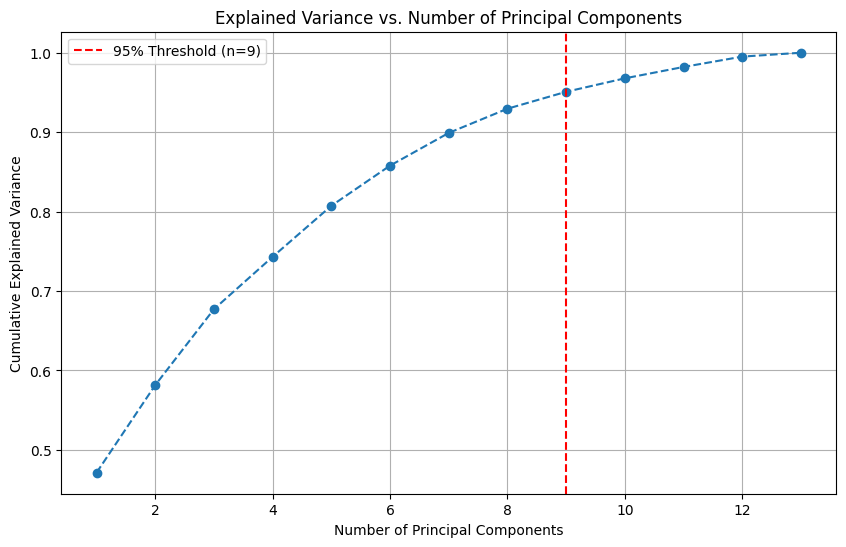

In [17]:
# Find the number of components that explain 95% of the variance
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Plotting the explained variance with a horizontal line at 95%
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axvline(x=n_components_95, color='r', linestyle='--', label=f'95% Threshold (n={n_components_95})')
plt.title('Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

Dalam konteks analisis PCA, memilih untuk menjaga 95% distribusi kumulatif adalah keputusan umum yang wajar. Ini karena, saat Anda mempertahankan sebagian besar varians data, Anda dapat mereduksi dimensi data dengan tetap mempertahankan informasi yang signifikan.

Distribusi kumulatif mencerminkan sejauh mana informasi dari fitur-fitur asli dapat dipertahankan oleh komponen-komponen utama yang dipilih. Jadi, dengan memilih 95%, Anda mengambil keputusan untuk mempertahankan sekitar 95% dari varians total dalam data asli.

Namun, keputusan ini juga dapat bergantung pada kasus penggunaan tertentu. Jika pemeliharaan dimensi atau interpretabilitas model lebih penting daripada mempertahankan sebagian besar varians, Anda mungkin memilih proporsi yang lebih rendah. Sebaliknya, jika preservasi varians yang tinggi penting untuk analisis Anda, Anda mungkin memilih ambang yang lebih tinggi, misalnya, 99%.

Penting untuk memahami tujuan analisis Anda dan berapa banyak informasi yang ingin Anda pertahankan. Tidak ada aturan yang kaku mengenai ambang distribusi kumulatif yang harus diambil

In [18]:
#ambil kolom yang berjumlah 95% distribusi
pca = PCA(n_components=n_components_95)
principal_components = pca.fit_transform(new_df)
principal_components

array([[-2.09829747,  0.77311275,  0.34294273, ...,  0.31864075,
         0.2958318 , -0.42493682],
       [-1.45725167,  0.59198521, -0.69519931, ...,  0.55386126,
        -0.22366994, -0.16696207],
       [-2.07459756,  0.5996394 ,  0.1671216 , ...,  0.48455996,
         0.10516613,  0.06977513],
       ...,
       [-0.31236047,  1.15524644, -0.40859759, ...,  0.29411936,
        -0.63866037,  0.98103226],
       [-0.27051907,  1.04136158, -0.58545406, ...,  0.27159707,
        -0.57934447,  0.9367553 ],
       [-0.12580322,  0.76197805, -1.294882  , ...,  0.17530965,
        -0.13338197,  0.85468922]])

In [19]:
# Membuat DataFrame untuk komponen utama
principal_components_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components_95 + 1)])

principal_components_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,-0.315338,0.318641,0.295832,-0.424937
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,0.264223,0.553861,-0.223670,-0.166962
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,0.448095,0.484560,0.105166,0.069775
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956,0.664649,0.622641,0.255941,-0.342246
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924,0.617047,0.705086,-0.134524,-0.417668


### Interpretasi :
Hasil PCA diatas dari PC1 hingga PC9, artinya sebaran nilai besaran vektor dari sekian banyak kolom pada data boston diatas memiliki nilai eigen tertinggi di PC1 dan memiliki kumpulan nilai vektor di tiap barisnya yang ada di tiap PC. Kemudian semakin kecil nilai eigennya hingga ke PC9. Nilai Eigen : PC1 > PC2 > ... > PC9. Kita pilih sampai PC9 karena memiliki sebaran distribusi 95% artinya, semua informasi pada dataset boston mencakup di 95% distribusi kolom data sekarang. Jumlah barisnya sama, tapi jumlah kolomnya tereduksi. PCA merupakan reduksi dimensi kolom (Dimensionality Reduction).

## Regression
1. With PCA Data
2. Without PCA Data

In [20]:
#Data dengan proses PCA
X_train_pca, X_test_pca,Y_train_pca,Y_test_pca = train_test_split(principal_components_df,y,
                                                test_size = 0.25, #75% train : 25% test
                                                random_state = 42)

In [21]:
# Lakukan train test split pada data yang TANPA hasil PCA
feats = ['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat']
X = df.drop('medv', axis=1)
y = df[['medv']]

#Splitting
X_train, X_test,Y_train,Y_test = train_test_split(X,y,
                                                test_size = 0.25,
                                                random_state = 42)

In [22]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
182,0.09103,0.0,2.46,0,0.4880,7.155,92.2,2.7006,3,193,17.8,394.12,4.82
155,3.53501,0.0,19.58,1,0.8710,6.152,82.6,1.7455,5,403,14.7,88.01,15.02
280,0.03578,20.0,3.33,0,0.4429,7.820,64.5,4.6947,5,216,14.9,387.31,3.76
126,0.38735,0.0,25.65,0,0.5810,5.613,95.6,1.7572,2,188,19.1,359.29,27.26
329,0.06724,0.0,3.24,0,0.4600,6.333,17.2,5.2146,4,430,16.9,375.21,7.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [23]:
feats

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat']

In [24]:
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Menerapkan standarisasi ke data pelatihan (train)
X_train.loc[:, feats] = scaler.fit_transform(X_train[feats])

# Menerapkan standarisasi yang sama ke data uji (test)
X_test.loc[:, feats] = scaler.transform(X_test[feats])

In [25]:
X_train.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02
mean,-8.436523e-17,2.226305e-17,3.351175e-16,-1.640435e-17,-4.897870e-16,-4.921305e-17,-9.842610e-17,1.406087e-17,8.085001e-17,9.725437e-17,-7.827219e-16,-1.171739e-17,-2.238022e-16
std,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00
min,-4.166677e-01,-5.028120e-01,-1.427082e+00,-2.878492e-01,-1.457007e+00,-3.421464e+00,-2.394486e+00,-1.248358e+00,-9.734004e-01,-1.316388e+00,-2.505059e+00,-4.101397e+00,-1.510635e+00
25%,-4.078913e-01,-5.028120e-01,-8.625839e-01,-2.878492e-01,-8.853889e-01,-6.028016e-01,-8.276134e-01,-8.000780e-01,-6.241558e-01,-7.616401e-01,-7.359034e-01,1.987826e-01,-7.912717e-01
50%,-3.853152e-01,-5.028120e-01,-2.059228e-01,-2.878492e-01,-1.708666e-01,-1.355740e-01,3.235952e-01,-3.087147e-01,-5.077409e-01,-4.541171e-01,1.486744e-01,3.727030e-01,-1.811785e-01
75%,-2.725877e-02,3.643814e-01,1.005156e+00,-2.878492e-01,6.781542e-01,4.741860e-01,8.928741e-01,7.050332e-01,7.728228e-01,1.571917e+00,8.563367e-01,4.232772e-01,5.437887e-01
max,1.029838e+01,3.833155e+00,2.393361e+00,3.474042e+00,2.628380e+00,3.415913e+00,1.115164e+00,3.963829e+00,1.704142e+00,1.843261e+00,1.652457e+00,4.363212e-01,3.566236e+00


## Modelling Tanpa PCA

In [26]:
model = LinearRegression()
model.fit(X_train, Y_train)  #ini model linearregressionnya belajar ke data BUKAN PCA

LinearRegression()

In [27]:
y_pred = model.predict(X_test) #Model dari hasil BUKAN PCA
y_pred_train = model.predict(X_train) #Model dari hasil BUKAN PCA

### Modelling Dengan PCA

In [28]:
from sklearn.linear_model import LinearRegression
model_pca = LinearRegression()
model_pca.fit(X_train_pca, Y_train_pca) #ini model linearregressionnya belajar ke data PCA

LinearRegression()

In [29]:
y_pred_pca = model_pca.predict(X_test_pca) #Model dari hasil PCA
y_pred_train_pca = model_pca.predict(X_train_pca) #Model dari hasil PCA

### Evaluasi

In [30]:
# RMSE : Itu makin kecil makin bagus
# RMSE : seberapa dekat nilai tebakan dengan nilai sebenarnya pada range max, min data target (medv)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('Data test (Unseen) RMSE DENGAN PCA : {}'.format(np.sqrt(mean_squared_error(Y_test_pca, y_pred_pca))))
print('Data test (Unseen) RMSE TANPA PCA : {}'.format(np.sqrt(mean_squared_error(Y_test, y_pred))))

#RMSE TANPA PCA LEBIH BAGUS DARIPADA PAKAI PCA KARENA ERRORNYA 4,70 < 5.194

Data test (Unseen) RMSE DENGAN PCA : 5.194805446213927
Data test (Unseen) RMSE TANPA PCA : 4.70092489060376


In [31]:
from sklearn.metrics import r2_score
# R2 : Makin gede makin bagus (1-100 %)
# R2 : Makin gede maka makin linear Modelnya
print('Data test (Unseen) R-Square DENGAN PCA : {}'.format((r2_score(Y_test_pca, y_pred_pca))*100))
print('Data test (Unseen) R-Square TANPA PCA : {}'.format((r2_score(Y_test, y_pred))*100))

#R SQUARE TANPA PCA LEBIH BAGUS DARIPADA PAKAI PCA KARENA ERRORNYA 61.463 < 68.442

Data test (Unseen) R-Square DENGAN PCA : 61.46350941109433
Data test (Unseen) R-Square TANPA PCA : 68.44267283527132


### Dari hasil diatas, baik dari RMSE model tanpa PCA lebih kecil daripada dengan PCA. Kemudian untuk R-square tanpa PCA lebih tinggi daripada dengan PCA, hal ini terjadi karena tingkat kompleksitas data tidak kompleks dan juga jumlah kolom yang tidak terlalu sedikit. Namun hal ini sengaja dilakukan supaya bisa mendapat ilmu dan pengalaman dalam menggunakan PCA dikombinasikan dengan Supervised Learning (bisa Regresi maupun klasifikasi, tergantung dataset)